#### NLP - Text Representation: TD-IDF

##### What is TF-IDF?

* TF stands for <strong>Term Frequency</strong> and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

Term Frequency (TF) = [number of times word appeared / Total number of words in a document]

* Term Frequency values ranges from 0 to 1. If a word occurs more number of times, then it's value will be close to 1.
* IDF stands for <strong>Inverse Document Frequency</strong> and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

Inverse Document Frequency (IDF) = [log(Total number of documents / Number of documents that contains the word)]

* In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will appraches to 0.
* Finally:

TF-IDF = TF * IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [4]:
# Let's create the vectorizer and fit the corpus and transform them accordingly

v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [5]:
# Let's print vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [6]:
print(v.get_feature_names_out())

['already' 'am' 'amazon' 'and' 'announcing' 'apple' 'are' 'ate' 'biryani'
 'dot' 'eating' 'eco' 'google' 'grapes' 'iphone' 'ironman' 'is' 'loki'
 'microsoft' 'model' 'new' 'pixel' 'pizza' 'surface' 'tesla' 'thor'
 'tomorrow' 'you']


In [7]:
# Let's print the IDF of each word

all_features_names = v.get_feature_names_out()

for word in all_features_names:
    idx = v.vocabulary_.get(word)
    idf_score = v.idf_[idx]
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [8]:
# Let's print the transformed output from tf-idf

print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

##### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

* This data consists of two columns.
    * Text: Description of an item sold on e-commerce website
    * Label: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [9]:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [10]:
# Check the distribution of labels

df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [12]:
df.rename(columns={'label':'Label'}, inplace=True)

In [13]:
df.head()

,Text,Label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [14]:
# Add the new column which gives a unique number to each of these labels

df['label_num'] = df['Label'].map({
    'Household': 0,
    'Electronics': 1,
    'Clothing & Accessories': 2,
    'Books': 3
})

In [16]:
df.tail()

,Text,Label,label_num
23995,Marvel Physics MCQ's for MHT - CET,Books,3
23996,Internet Download Manager | Lifetime License |...,Books,3
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,0
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,1
23999,LG GH24NSB0 DVD Writer 24X SATA Internal OEM P...,Electronics,1


##### Train test split
Build a model with original text (no pre processing)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [18]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [19]:
X_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23276                     Rupa Thermocot Men's Thermal Top
4959     Kuchipoo Front Open Kids Thermal Top & Pyjama ...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5104     Adulthood Is a Myth: A Sarah's Scribbles Colle...
Name: Text, dtype: object

In [20]:
y_train.head()

15820    0
23276    2
4959     2
15245    0
5104     3
Name: label_num, dtype: int64

In [21]:
y_train.value_counts()

label_num
0    4800
2    4800
3    4800
1    4800
Name: count, dtype: int64

In [22]:
y_test.value_counts()

label_num
0    1200
2    1200
3    1200
1    1200
Name: count, dtype: int64

##### Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

#### Note:

* use TF-IDF for pre-processing the text.

* use KNN as the classifier

* print the classification report.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



##### Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

##### Note:

* use TF-IDF for pre-processing the text.

* use MultinomialNB as the classifier.

* print the classification report.

In [25]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



##### Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

##### Note:

* use TF-IDF for pre-processing the text.

* use Random Forest as the classifier.

* print the classification report.

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



##### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [29]:
import spacy

nlp = spacy.load("en_core_web_lg")

def preprocesses(text):
    filtered_tokens = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [30]:
df['preprocesses_text'] = df['Text'].apply(preprocesses)

In [31]:
df.head()

,Text,Label,label_num,preprocesses_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY pci40010 PCI raid host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [32]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [33]:
df.preprocesses_text[0]

'Urban Ladder Eisner Low Study Office Computer chair(black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

#### Build a model with pre processed text

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocesses_text, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num,
)

In [41]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.97      0.97      1200
           2       0.98      0.99      0.98      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.97      0.98      4800



If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

##### Plot confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1161,   15,   14,   10],
       [  22, 1168,    4,    6],
       [   9,    2, 1183,    6],
       [  17,   11,    4, 1168]])

Text(95.72222222222221, 0.5, 'Truth')

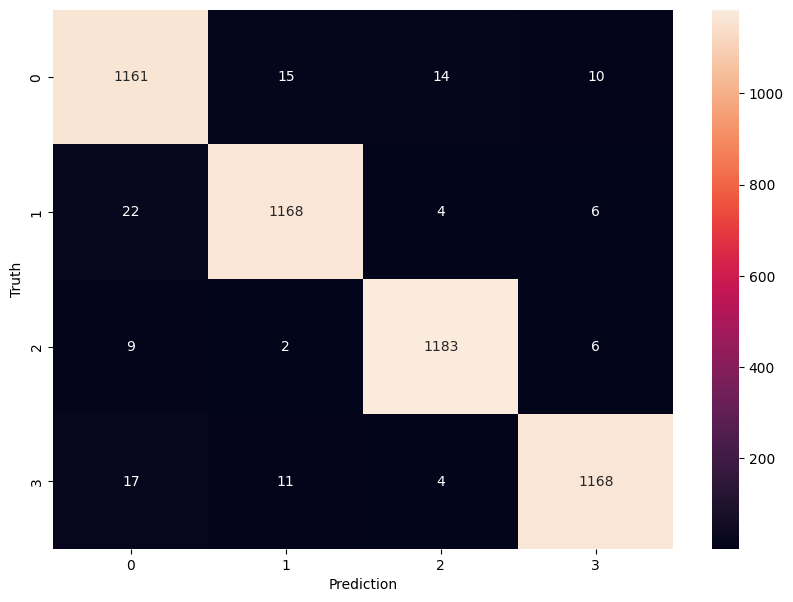

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')